In [1]:
# Import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from csv file and make a data frame
orders = pd.read_csv("./datasets/restaurant-1-orders.csv")
orders

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7
74814,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6
74815,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9
74816,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6


In [3]:
# Check NaN value of dataset
orders.isna().sum()

Order Number      0
Order Date        0
Item Name         0
Quantity          0
Product Price     0
Total products    0
dtype: int64

In [4]:
orders.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [5]:
orders.tail()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
74813,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7
74814,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6
74815,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9
74816,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6
74817,1403,02/10/2015 17:29,House Red wine 75cl,1,17.95,9


In [6]:
orders.describe()

,Order Number,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [8]:
# Data type of Order Date is object. Cast to datetime
orders['Order Date'] = pd.to_datetime(orders['Order Date'], dayfirst=True)
orders

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,2019-08-03 20:25:00,Plain Papadum,2,0.80,6
1,16118,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6
2,16118,2019-08-03 20:25:00,Garlic Naan,1,2.95,6
3,16118,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6
4,16118,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,2016-05-18 18:53:00,House Red wine 75cl,2,17.95,7
74814,2503,2016-05-14 19:28:00,House Red wine 75cl,2,17.95,6
74815,2467,2016-05-10 13:18:00,House Red wine 75cl,2,17.95,9
74816,2249,2016-04-07 19:04:00,House white wine 75cl,1,17.95,6


In [9]:
# Find sum order each date and reset index
orders_quantity_by_date = orders[['Order Date', 'Quantity']].resample('D', on='Order Date').sum().reset_index()
orders_quantity_by_date

,Order Date,Quantity
0,2015-09-01,1
1,2015-09-02,0
2,2015-09-03,0
3,2015-09-04,0
4,2015-09-05,0
...,...,...
1428,2019-07-30,100
1429,2019-07-31,87
1430,2019-08-01,65
1431,2019-08-02,132


In [10]:
# Find the min value of order date
orders_quantity_by_date['Order Date'].min()

Timestamp('2015-09-01 00:00:00')

In [11]:
# Find the max value of order date
orders_quantity_by_date['Order Date'].max()

Timestamp('2019-08-03 00:00:00')

[]

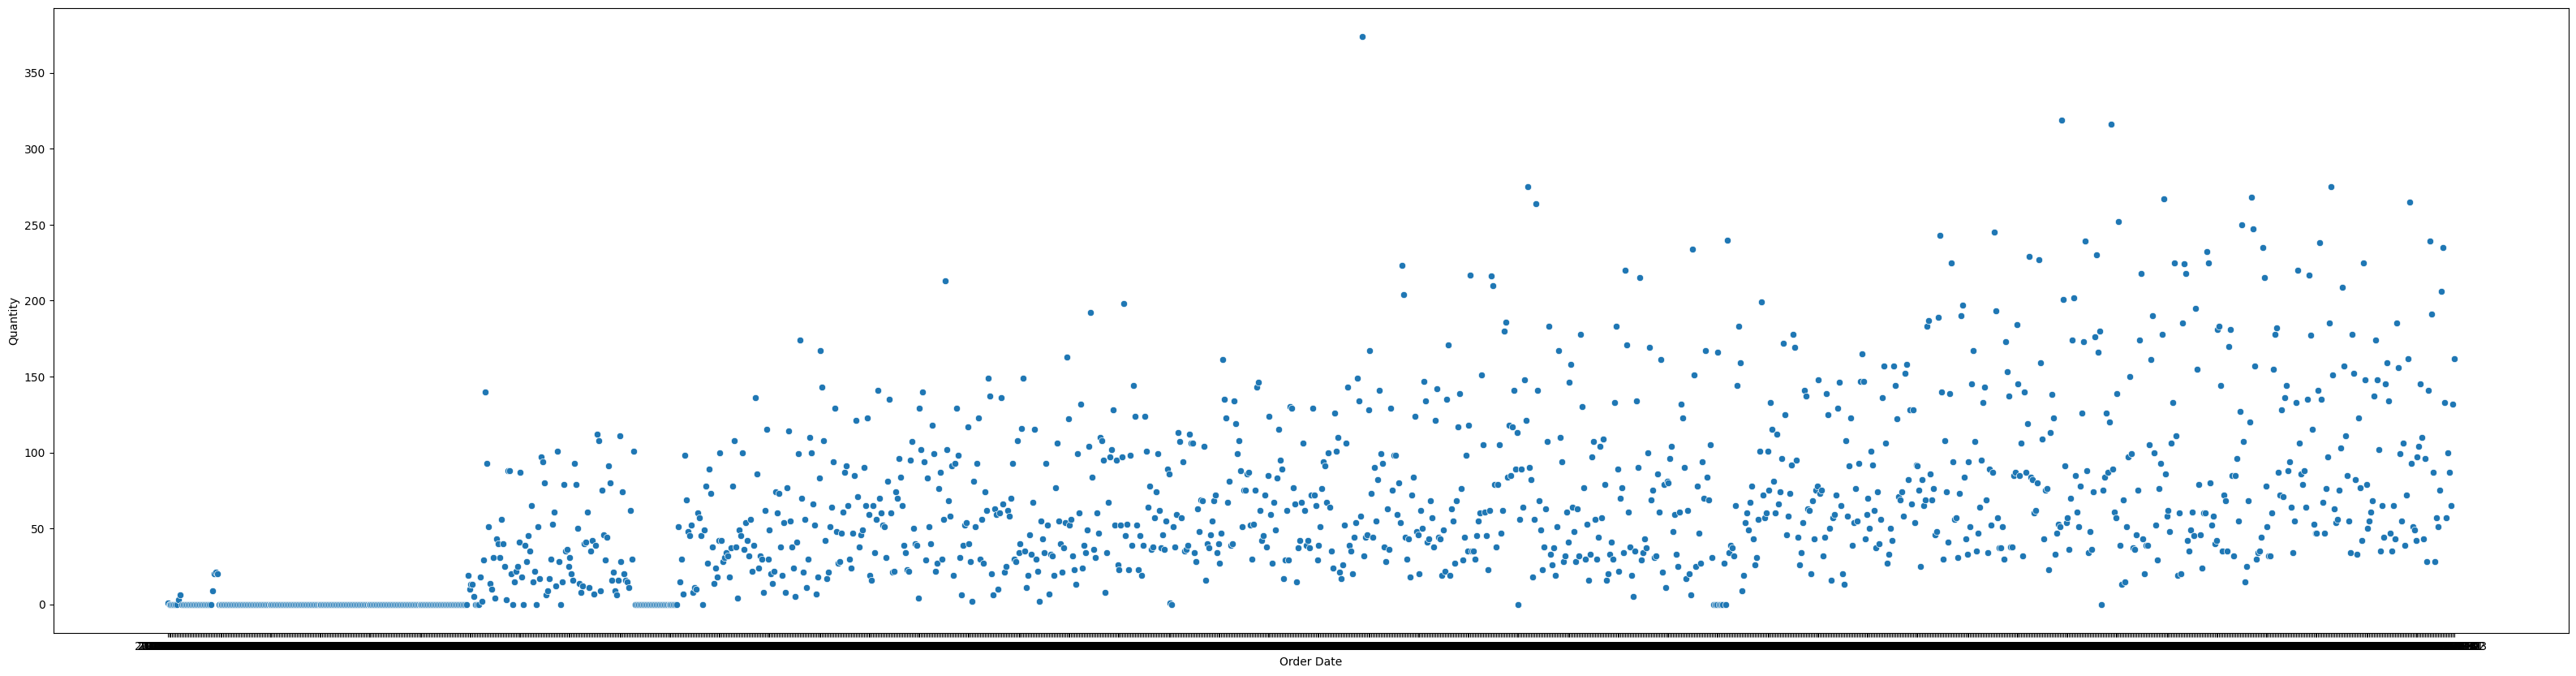

In [12]:
# X axis for plot
x_axis = pd.date_range(start='2015-09-01', end='2019-08-03')

# Y axis - count of order
plt.figure(figsize=(40, 10))
sns.scatterplot(x = orders_quantity_by_date['Order Date'], y = orders_quantity_by_date['Quantity'])
plt.xticks(x_axis)
plt.plot()

In [13]:
# Get the 2018 orders
orders_2018_df = orders_quantity_by_date.loc[(orders_quantity_by_date['Order Date'] >= '2018-01-01') & (orders_quantity_by_date['Order Date'] < '2019-01-01')]
orders_2018_df

,Order Date,Quantity
853,2018-01-01,90
854,2018-01-02,82
855,2018-01-03,18
856,2018-01-04,56
857,2018-01-05,264
...,...,...
1213,2018-12-27,84
1214,2018-12-28,126
1215,2018-12-29,87
1216,2018-12-30,120


[]

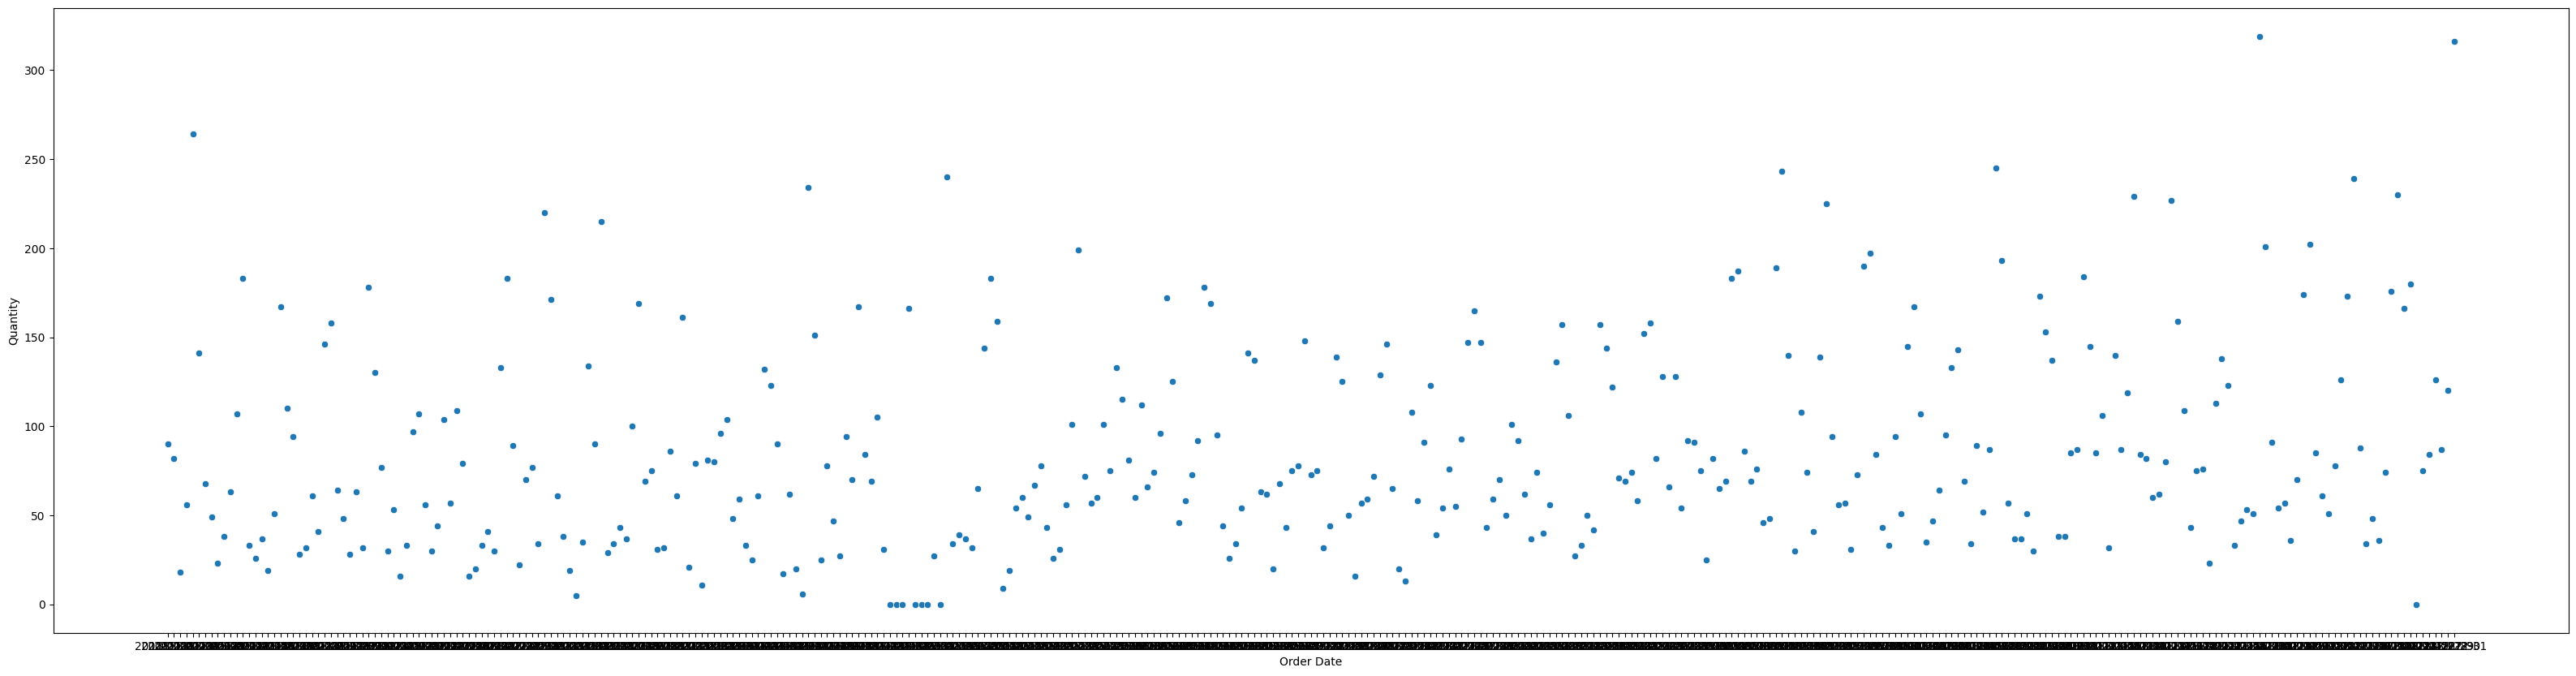

In [14]:
# X axis for plot
x_axis = pd.date_range(start='2018-01-01', end='2018-12-31')

# Y axis - count of order
plt.figure(figsize=(40, 10))
sns.scatterplot(x = orders_2018_df['Order Date'], y = orders_2018_df['Quantity'])
plt.xticks(x_axis)
plt.plot()

[]

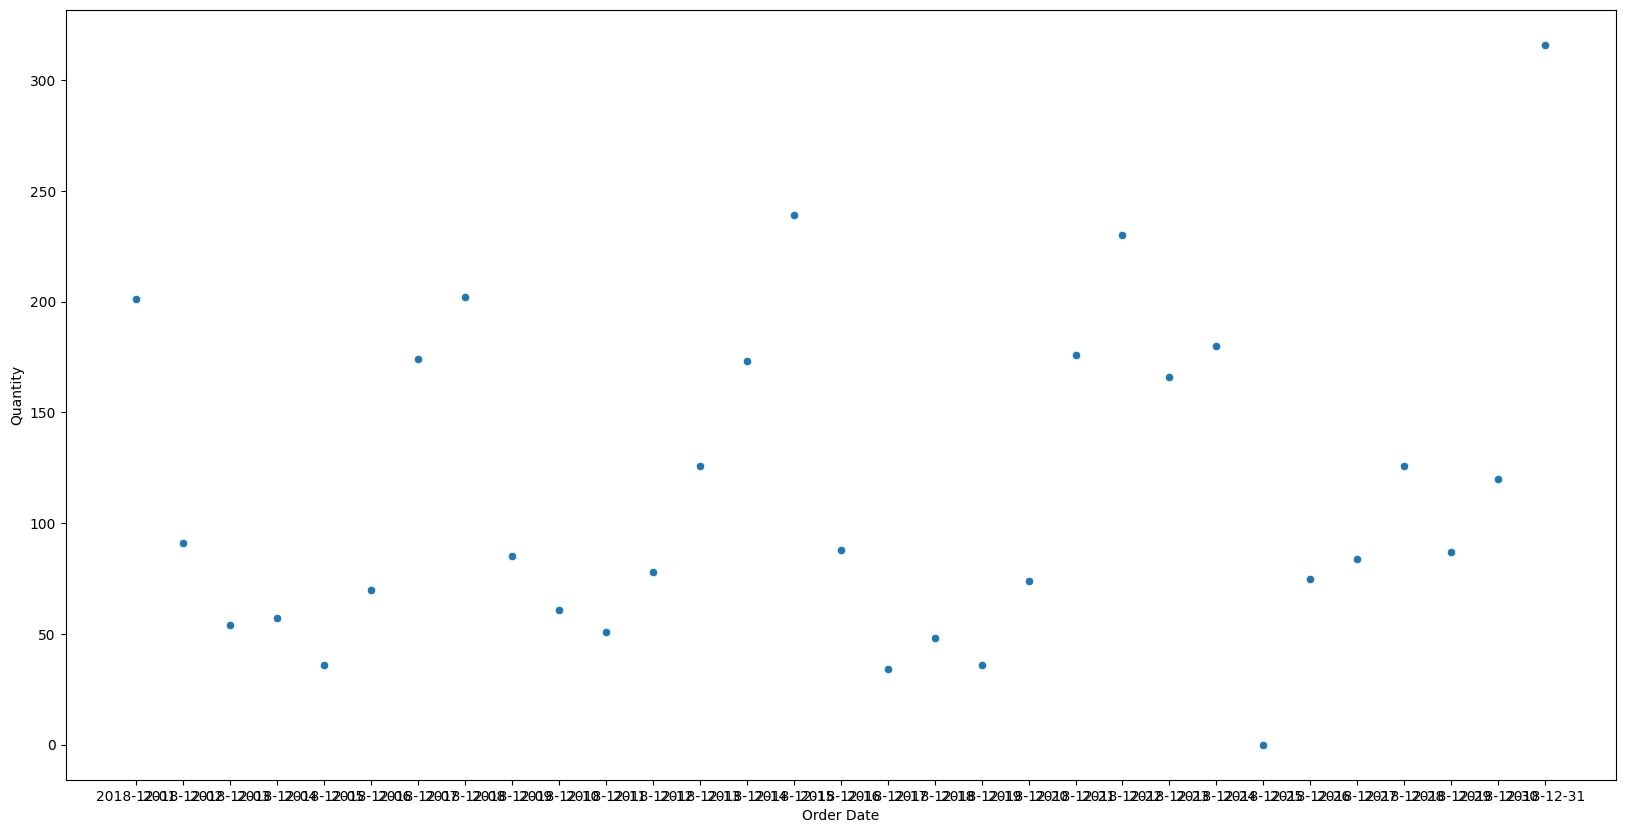

In [15]:
orders_2018_dec_df = orders_quantity_by_date.loc[(orders_quantity_by_date['Order Date'] >= '2018-12-01') & (orders_quantity_by_date['Order Date'] < '2019-01-01')]
# X axis for plot
x_axis = pd.date_range(start='2018-12-01', end='2018-12-31')

# Y axis - count of order
plt.figure(figsize=(20, 10))
sns.scatterplot(x = orders_2018_dec_df['Order Date'], y = orders_2018_dec_df['Quantity'])
plt.xticks(x_axis)
plt.plot()

In [16]:
# Find the most sold item
sold_item = orders[['Item Name', 'Quantity' ,'Total products']]
sold_item = sold_item.groupby("Item Name").sum().sort_values(by = 'Total products', ascending = 0)
sold_item

,Quantity,Total products
Item Name,,
Pilau Rice,6367,31314
Plain Papadum,10648,27140
Plain Naan,4983,24276
Onion Bhajee,2749,17293
Garlic Naan,3318,17143
...,...,...
Sheek Kehab,6,32
Tandoori Chicken,1,6
Lamb Persian,1,5


In [17]:
# Average order by week and month
print("Weekly:\n", orders.groupby([pd.Grouper(key='Order Date', freq='W-MON')])['Quantity'].sum().mean())
print("Monthly:\n", orders.groupby([pd.Grouper(key='Order Date', freq='ME')])['Quantity'].sum().mean())

Weekly:
 453.85853658536587
Monthly:
 1938.3541666666667


In [18]:
# Make predictions next week
df = orders[['Order Date', 'Quantity']]
df = df.groupby([pd.Grouper(key='Order Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Order Date')
df

,Order Date,Quantity
0,2015-09-07,1
1,2015-09-14,9
2,2015-09-21,0
3,2015-09-28,0
4,2015-10-05,70
...,...,...
200,2019-07-08,788
201,2019-07-15,590
202,2019-07-22,810
203,2019-07-29,814


In [19]:
# Add seasonality
df['Week'] = df['Order Date'].dt.isocalendar().week
df['Month'] = df['Order Date'].dt.month
df

,Order Date,Quantity,Week,Month
0,2015-09-07,1,37,9
1,2015-09-14,9,38,9
2,2015-09-21,0,39,9
3,2015-09-28,0,40,9
4,2015-10-05,70,41,10
...,...,...,...,...
200,2019-07-08,788,28,7
201,2019-07-15,590,29,7
202,2019-07-22,810,30,7
203,2019-07-29,814,31,7


In [20]:
for i in range (1,15):
    label = "Quantity_" + str(i)
    df[label] = df['Quantity'].shift(i)
    label = "Average_" + str(i)
    df[label] = df['Quantity'].rolling(i).mean()
df = df.dropna()
df

,Order Date,Quantity,Week,Month,Quantity_1,Average_1,Quantity_2,Average_2,Quantity_3,Average_3,...,Quantity_10,Average_10,Quantity_11,Average_11,Quantity_12,Average_12,Quantity_13,Average_13,Quantity_14,Average_14
14,2015-12-14,0,51,12,0.0,0.0,0.0,0.0,0.0,0.000000,...,70.0,0.0,0.0,6.363636,0.0,5.833333,9.0,5.384615,1.0,5.642857
15,2015-12-21,0,52,12,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,70.0,0.000000,0.0,5.833333,0.0,5.384615,9.0,5.000000
16,2015-12-28,0,53,12,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,70.0,0.000000,0.0,5.384615,0.0,5.000000
17,2016-01-04,0,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,70.0,0.000000,0.0,5.000000
18,2016-01-11,0,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,70.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2019-07-08,788,28,7,638.0,788.0,629.0,713.0,745.0,685.000000,...,698.0,742.5,733.0,738.454545,726.0,738.000000,692.0,737.076923,915.0,733.857143
201,2019-07-15,590,29,7,788.0,590.0,638.0,689.0,629.0,672.000000,...,875.0,714.0,698.0,728.636364,733.0,726.083333,726.0,726.615385,692.0,726.571429
202,2019-07-22,810,30,7,590.0,810.0,788.0,700.0,638.0,729.333333,...,728.0,722.2,875.0,722.727273,698.0,735.416667,733.0,732.538462,726.0,732.571429
203,2019-07-29,814,31,7,810.0,814.0,590.0,812.0,788.0,738.000000,...,894.0,714.2,728.0,730.545455,875.0,730.333333,698.0,741.461538,733.0,738.357143


In [21]:
# One hot encode
for column in ['Week','Month']:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df

,Order Date,Quantity,Quantity_1,Average_1,Quantity_2,Average_2,Quantity_3,Average_3,Quantity_4,Average_4,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
14,2015-12-14,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,False,False,False,False,False,False,False,False,False,True
15,2015-12-21,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,False,False,False,False,False,False,False,False,False,True
16,2015-12-28,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,False,False,False,False,False,False,False,False,False,True
17,2016-01-04,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
18,2016-01-11,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2019-07-08,788,638.0,788.0,629.0,713.0,745.0,685.000000,744.0,700.00,...,False,False,False,False,True,False,False,False,False,False
201,2019-07-15,590,788.0,590.0,638.0,689.0,629.0,672.000000,745.0,661.25,...,False,False,False,False,True,False,False,False,False,False
202,2019-07-22,810,590.0,810.0,788.0,700.0,638.0,729.333333,629.0,706.50,...,False,False,False,False,True,False,False,False,False,False
203,2019-07-29,814,810.0,814.0,590.0,812.0,788.0,738.000000,638.0,750.50,...,False,False,False,False,True,False,False,False,False,False


In [22]:
# Show the shape of one hot encode dataframe
df.shape

(191, 95)

In [23]:
# 191 * 0.8 = train (152)
train = df[:153].drop('Order Date', axis=1)
test = df[153:].drop('Order Date', axis=1)
x_train = train.drop(['Quantity'], axis=1)
y_train = train['Quantity']

x_test = test.drop(['Quantity'], axis=1)
y_test = test['Quantity']

In [24]:
x_train

,Quantity_1,Average_1,Quantity_2,Average_2,Quantity_3,Average_3,Quantity_4,Average_4,Quantity_5,Average_5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
14,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
15,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
16,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
17,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
18,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,632.0,585.0,675.0,608.5,737.0,630.666667,772.0,657.25,741.0,680.2,...,False,False,False,False,False,False,False,True,False,False
163,585.0,760.0,632.0,672.5,675.0,659.000000,737.0,663.00,772.0,677.8,...,False,False,False,False,False,False,False,True,False,False
164,760.0,619.0,585.0,689.5,632.0,654.666667,675.0,649.00,737.0,654.2,...,False,False,False,False,False,False,False,True,False,False
165,619.0,730.0,760.0,674.5,585.0,703.000000,632.0,673.50,675.0,665.2,...,False,False,False,False,False,False,False,False,True,False


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
from xgboost import XGBRegressor

#Model for df
model = XGBRegressor(n_estimators=500, learning_rate=0.01, eval_metric='rmsle', early_stopping_rounds=20)
eval_set = [(x_train, y_train)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)


[0]	validation_0-rmsle:1.94938
[1]	validation_0-rmsle:1.94586
[2]	validation_0-rmsle:1.94235
[3]	validation_0-rmsle:1.93885
[4]	validation_0-rmsle:1.93535
[5]	validation_0-rmsle:1.93187
[6]	validation_0-rmsle:1.92840
[7]	validation_0-rmsle:1.92493
[8]	validation_0-rmsle:1.92148
[9]	validation_0-rmsle:1.91803
[10]	validation_0-rmsle:1.91459
[11]	validation_0-rmsle:1.91116
[12]	validation_0-rmsle:1.90773
[13]	validation_0-rmsle:1.90432
[14]	validation_0-rmsle:1.90091
[15]	validation_0-rmsle:1.89750
[16]	validation_0-rmsle:1.89411
[17]	validation_0-rmsle:1.89072
[18]	validation_0-rmsle:1.88734
[19]	validation_0-rmsle:1.88396
[20]	validation_0-rmsle:1.88060
[21]	validation_0-rmsle:1.87723
[22]	validation_0-rmsle:1.87388
[23]	validation_0-rmsle:1.87053
[24]	validation_0-rmsle:1.86719
[25]	validation_0-rmsle:1.86385
[26]	validation_0-rmsle:1.86052
[27]	validation_0-rmsle:1.85719
[28]	validation_0-rmsle:1.85387
[29]	validation_0-rmsle:1.85056
[30]	validation_0-rmsle:1.84725
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [26]:
y_pred = model.predict(x_test)
y_pred

array([733.6967 , 574.8367 , 771.1029 , 676.1001 , 766.3347 , 817.00183,
       766.3347 , 630.4213 , 517.3211 , 598.703  , 676.1001 , 766.3347 ,
       691.99866, 766.3347 , 627.4699 , 726.9495 , 676.1001 , 630.4213 ,
       726.9495 , 817.00183, 689.0588 , 723.4752 , 726.9495 , 691.99866,
       817.00183, 723.4752 , 817.00183, 755.56445, 617.6575 , 738.97864,
       738.97864, 627.4699 , 630.4213 , 771.1029 , 583.80225, 771.1029 ,
       766.3347 , 541.0409 ], dtype=float32)

In [27]:
y_pred = pd.Series(y_pred)
eval_df = df[153:].reset_index(drop = True)
eval_df['Prediction'] = y_pred
eval_df = eval_df[['Order Date','Quantity', 'Prediction']]
eval_df.head()

,Order Date,Quantity,Prediction
0,2018-11-19,740,733.696716
1,2018-11-26,581,574.836670
2,2018-12-03,816,771.102905
3,2018-12-10,685,676.100098
4,2018-12-17,789,766.334717


Text(0.5, 1.0, 'Total Sales')

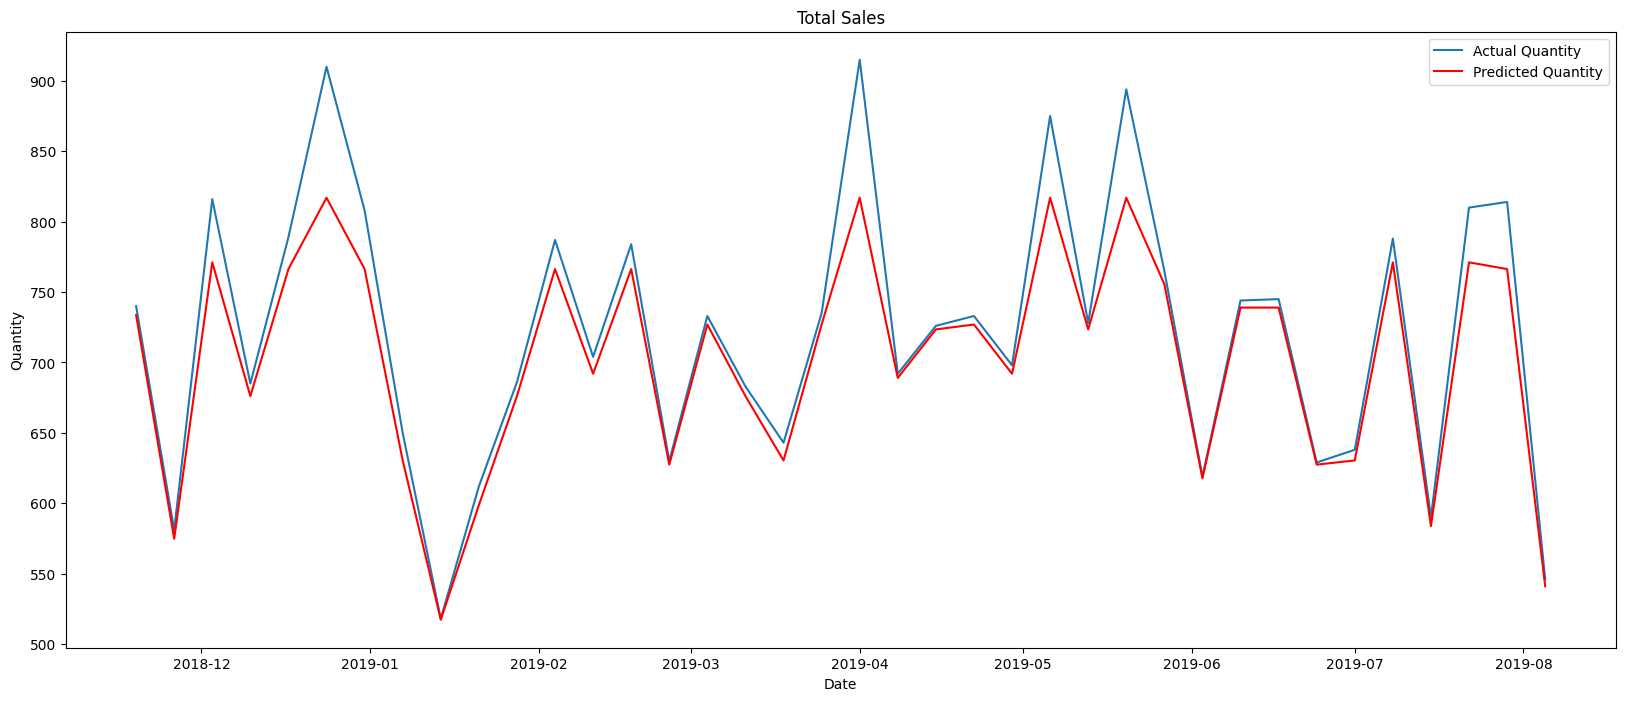

In [28]:
plt.figure(figsize = (20,8))
plt.plot(eval_df['Order Date'], eval_df['Quantity'], label = "Actual Quantity")
plt.plot(eval_df['Order Date'], eval_df['Prediction'], color = 'red', label = 'Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.title('Total Sales')

In [29]:
print("Metrics for Total Sale\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, y_pred))
print("R Squared:\n", r2_score(y_test, y_pred))
print("Mean Squared Log Error:\n", mean_squared_log_error(y_test, y_pred))

Metrics for Total Sale

Mean Absolute Error:
 19.843982696533203
R Squared:
 0.8914990425109863
Mean Squared Log Error:
 0.0014621182344853878


In [30]:
# Hyper parameters tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
}

model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1}


In [31]:
#Model for df after tuning
model = XGBRegressor(n_estimators=500, learning_rate=0.1, eval_metric='rmsle', early_stopping_rounds=20)
eval_set = [(x_train, y_train)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred = model.predict(x_test)
y_pred

array([736.8608 , 576.0272 , 785.00354, 677.30646, 772.68866, 830.2073 ,
       772.3331 , 631.97705, 517.5636 , 601.06354, 677.03674, 772.7921 ,
       693.7386 , 772.8168 , 629.0965 , 730.0309 , 677.421  , 632.05536,
       731.011  , 830.6617 , 691.7179 , 724.88666, 731.0577 , 693.7623 ,
       830.6614 , 725.7531 , 830.66144, 759.9542 , 619.1888 , 741.9931 ,
       743.0634 , 628.8933 , 631.8447 , 785.2718 , 585.0141 , 785.01514,
       772.53107, 541.7788 ], dtype=float32)

In [33]:
y_pred = pd.Series(y_pred)
eval_df = df[153:].reset_index(drop = True)
eval_df['Prediction'] = y_pred
eval_df = eval_df[['Order Date','Quantity', 'Prediction']]
eval_df.head()

,Order Date,Quantity,Prediction
0,2018-11-19,740,736.860779
1,2018-11-26,581,576.027222
2,2018-12-03,816,785.003540
3,2018-12-10,685,677.306458
4,2018-12-17,789,772.688660


Text(0.5, 1.0, 'Total Sales')

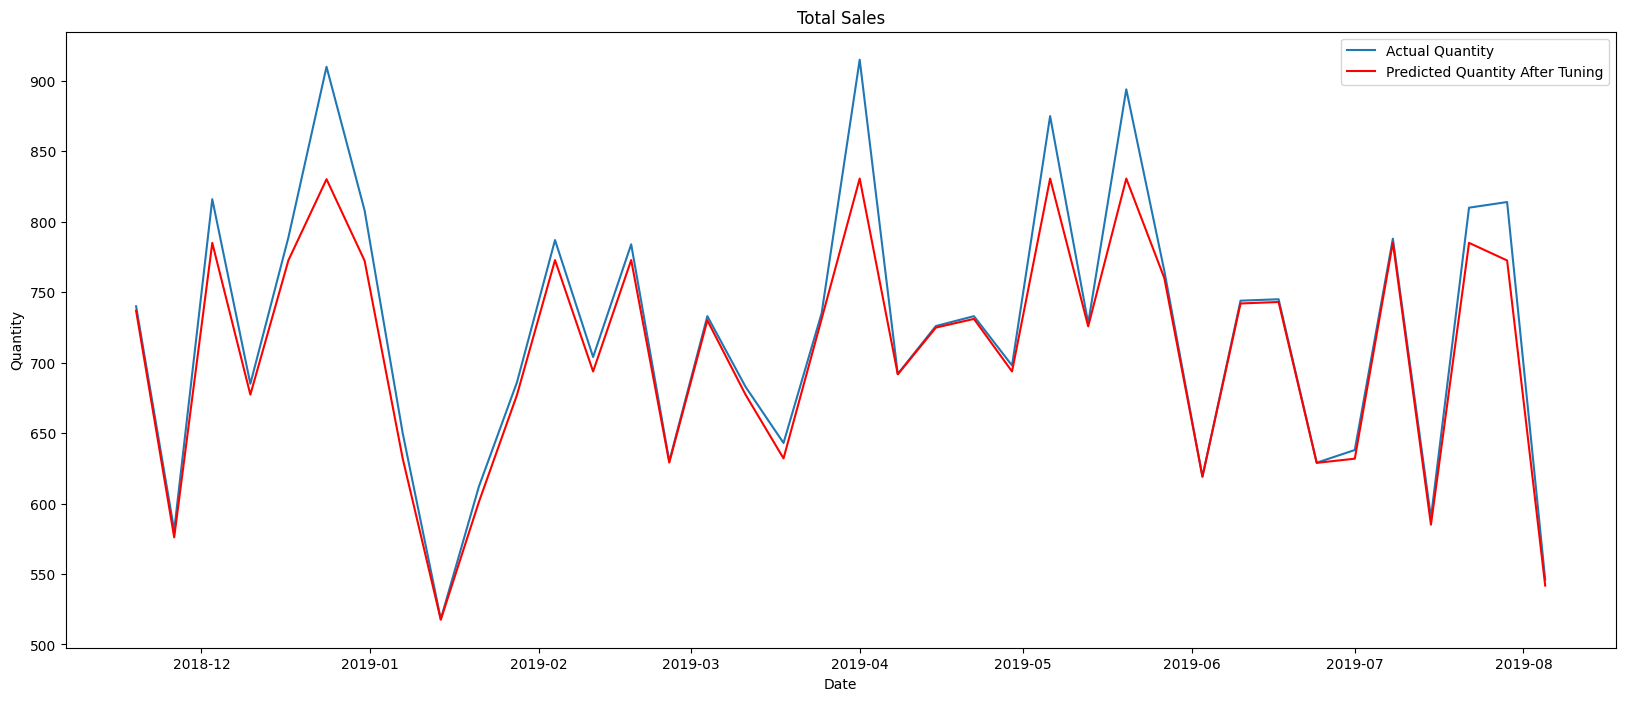

In [34]:
plt.figure(figsize = (20,8))
plt.plot(eval_df['Order Date'], eval_df['Quantity'], label = "Actual Quantity")
plt.plot(eval_df['Order Date'], eval_df['Prediction'], color = 'red', label = 'Predicted Quantity After Tuning')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.title('Total Sales')

In [35]:
print("Metrics for Total Sale after Tuning\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, y_pred))
print("R Squared:\n", r2_score(y_test, y_pred))
print("Mean Squared Log Error:\n", mean_squared_log_error(y_test, y_pred))

Metrics for Total Sale after Tuning

Mean Absolute Error:
 15.069387435913086
R Squared:
 0.9272133708000183
Mean Squared Log Error:
 0.000960634439252317


In [37]:
param_grid = {
    'n_estimators': [500, 700, 900],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(x_train, y_train)

# Get best parameter
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

model = XGBRegressor(**best_params, early_stopping_rounds=30)
model.fit(x_train, y_train, eval_set=[(x_train, y_train)], verbose=True)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 700, 'subsample': 0.8}
[0]	validation_0-rmse:166.85067
[1]	validation_0-rmse:136.92704
[2]	validation_0-rmse:112.29998
[3]	validation_0-rmse:91.79264
[4]	validation_0-rmse:75.20851
[5]	validation_0-rmse:62.09656
[6]	validation_0-rmse:50.96297
[7]	validation_0-rmse:42.04347
[8]	validation_0-rmse:34.89950
[9]	validation_0-rmse:29.04410
[10]	validation_0-rmse:24.19501
[11]	validation_0-rmse:20.15382
[12]	validation_0-rmse:17.04049
[13]	validation_0-rmse:14.31408
[14]	validation_0-rmse:12.03462
[15]	validation_0-rmse:10.41176
[16]	validation_0-rmse:8.90360
[17]	validation_0-rmse:7.66004
[18]	validation_0-rmse:6.60507
[19]	validation_0-rmse:5.83403
[20]	validation_0-rmse:5.08038
[21]	validation_0-rmse:4.62087
[22]	validation_0-rmse:4.24249
[23]	validation_0-rmse:3.74873
[24]	validation_0-rmse:3.43892
[25]	validation_0-rmse:3.24370
[26]	validation_0-rmse:2.888

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
print("Metrics for Total Sale after Tuning\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, y_pred))
print("R Squared:\n", r2_score(y_test, y_pred))
print("Mean Squared Log Error:\n", mean_squared_log_error(y_test, y_pred))

Metrics for Total Sale after Tuning

Mean Absolute Error:
 15.069387435913086
R Squared:
 0.9272133708000183
Mean Squared Log Error:
 0.000960634439252317


In [ ]:
import joblib
